Ignacio Vellido Expósito

In [1]:
import cv2

# Función para mostrar varias imágenes en una sola ventana
import numpy as np
from matplotlib import pyplot as plt

def plot_vector_img(vim, cols=0, titles=None, suptitle=None, gray=False):
    """ Visualiza varias imágenes a la vez """
    n_images = len(vim)

    if not cols:
        cols = 7 if len(vim) >= 7 else len(vim)

    if titles is None:
        titles = ['' for i in range(1, n_images+1)]

    if suptitle is None:
          suptitle = ''

    fig = plt.figure()
    for n, (image, title) in enumerate(zip(vim, titles)):
        a = fig.add_subplot(int(np.ceil(n_images/float(cols))), cols, n+1)          
        plt.imshow(image, "gray" if gray else None)        

        a.set_title(title)        
        a.axis('off')    

    fig.suptitle(suptitle)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    fig.subplots_adjust(bottom=0)

    plt.show()

Obtener la representación en hsv de los colores: amarillo, naranja, púrpura,

In [16]:
# Amarillo
yellow_rgb = np.ones((1,1,3), dtype='uint8') * 255
yellow_rgb[:,:,2] = 0
yellow_hsv = cv2.cvtColor(yellow_rgb, cv2.COLOR_RGB2HSV)

# Naranja
orange_rgb = np.ones((1,1,3), dtype='uint8') * 255
orange_rgb[:,:,1] = 128
orange_rgb[:,:,2] = 0
orange_hsv = cv2.cvtColor(orange_rgb, cv2.COLOR_RGB2HSV)

# Purple
purple_rgb = np.ones((1,1,3), dtype='uint8') * 128
purple_rgb[:,:,1] = 0
purple_hsv = cv2.cvtColor(purple_rgb, cv2.COLOR_RGB2HSV)

# El color va de 0º a 180º
print("Amarillo:\tRGB{}\t-\tHSV{}".format(yellow_rgb[0,0,:], yellow_hsv[0,0,:]))
print("Naranja:\tRGB{}\t-\tHSV{}".format(orange_rgb[0,0,:], orange_hsv[0,0,:]))
print("Púrpura:\tRGB{}\t-\tHSV{}".format(purple_rgb[0,0,:], purple_hsv[0,0,:]))

Amarillo:	RGB[255 255   0]	-	HSV[ 30 255 255]
Naranja:	RGB[255 128   0]	-	HSV[ 15 255 255]
Púrpura:	RGB[128   0 128]	-	HSV[150 255 128]


Crear un video para obtener la gama de grises de una imagen

In [11]:
grays = cv2.imread("chica.jpg", cv2.IMREAD_GRAYSCALE)
size = grays.shape[:2]

fps=10
video =cv2.VideoWriter('grises.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

aux = grays
img_array = []

for i in range(0,256):
    aux[:,:] = ((aux[:,:]+1) % 256)
    img_array.append(aux)

for i in range(len(img_array)):
    video.write(img_array[i])
    
video.release()

Crear un video para obtener para el color verde todos sus valores diferentes en luminosidad.

In [31]:
green = np.zeros((200,200,3), dtype='uint8')
green[:,:,1] = 255

size = green.shape[:2]
green_lab = cv2.cvtColor(green, cv2.COLOR_BGR2LAB)

print("Verde:\tRGB{}\t-\tLAB{}".format(green[0,0,:], green_lab[0,0,:]))

fps=10
video =cv2.VideoWriter('verdes.avi', cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

aux = green_lab
img_array = []

for i in range(0,256):
    aux[:,:,0] = i    
    frame = cv2.cvtColor(aux,cv2.COLOR_LAB2BGR)
    img_array.append(frame)

for i in range(len(img_array)):
    video.write(img_array[i])
    
video.release()


Verde:	RGB[  0 255   0]	-	LAB[224  42 211]


Crear un video para obtener para el color azul todos sus valores diferentes en saturación

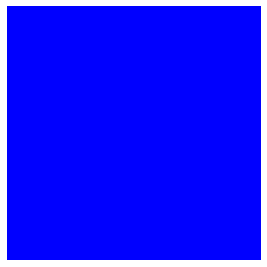

Azul:	RGB[  0   0 255]	-	HSV[120 255 255]


In [32]:
blues = np.zeros((200,200,3), dtype='uint8')
blues[:,:,2] = 255

size = blues.shape[:2]
blues_hsv = cv2.cvtColor(blues, cv2.COLOR_RGB2HSV)

plot_vector_img([blues])

print("Azul:\tRGB{}\t-\tHSV{}".format(blues[0,0,:], blues_hsv[0,0,:]))

fps = 10
video = cv2.VideoWriter('azules.avi', cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

aux = blues_hsv
img_array = []

for i in range(0,256):
    aux[:,:,1] = i
    frame = cv2.cvtColor(aux, cv2.COLOR_HSV2BGR)
    img_array.append(frame)

for i in range(len(img_array)):
    video.write(img_array[i])
    
video.release()


Sobre la imagen pez2 segmentar la información naranja

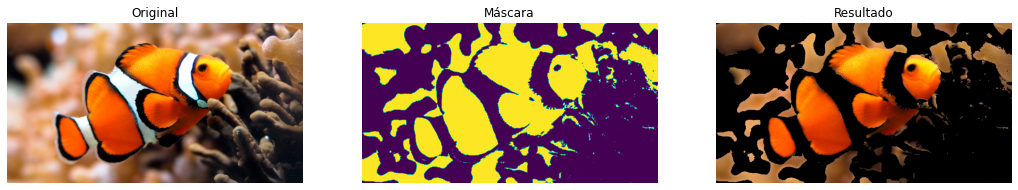

In [10]:
pez2 = cv2.imread("pez2.jpg", cv2.IMREAD_COLOR)
pez2_rgb = cv2.cvtColor(pez2, cv2.COLOR_BGR2RGB)
pez2_hsv = cv2.cvtColor(pez2, cv2.COLOR_BGR2HSV)

# Naranja: HSV(15,255,255)
# Cogemos el rango de +-30º
lower_orange = np.array([0,128,50])
upper_orange = np.array([45,255,255])
mask = cv2.inRange(pez2_hsv, lower_orange, upper_orange)

lower_orange = np.array([165,128,50])
upper_orange = np.array([179,255,255])
mask2 = cv2.inRange(pez2_hsv, lower_orange, upper_orange)
mask = cv2.bitwise_or(mask, mask2)

# Aplicando la máscara
res = cv2.bitwise_and(pez2, pez2, mask=mask)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

plot_vector_img([pez2_rgb, mask, res], titles=["Original", "Máscara", "Resultado"])

Sobre la imagen pez1 cambiar el azul a naranja

(Por la intensidad de los azules en la imagen el resultado no se ve tan naranja. Aunque no sea la distancia correcta, habría que sumarle menor valor de H para obtener más tonos anaranjados)

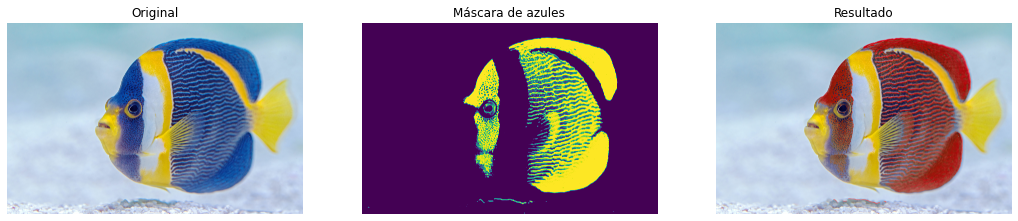

In [108]:
pez1 = cv2.imread("pez1.jpg", cv2.IMREAD_COLOR)
pez1_rgb = cv2.cvtColor(pez1, cv2.COLOR_BGR2RGB)
pez1_hsv = cv2.cvtColor(pez1, cv2.COLOR_BGR2HSV)

# Del azul al naranja en HSV hay una distancia de 75º
# Por tanto le sumamos 75º a los colores que salgan de la máscara

# Máscara de los azules: 120º +- 30º
lower_blue = np.array([90,100,100])
upper_blue = np.array([150,255,255])
mask = cv2.inRange(pez1_hsv, lower_blue, upper_blue)

# Máscara negada
mask_neg = 255 - mask

# Aplicando la máscara positiva
res = cv2.bitwise_and(pez1_hsv, pez1_hsv, mask=mask) 
res[:,:,0] = np.where(res[:,:,0] == 0, 0, (res[:,:,0] + 75) % 180) # Pasándolo a naranja

# Aplicando la máscara negativa
res2 = cv2.bitwise_and(pez1_hsv, pez1_hsv, mask=mask_neg)
fin = res + res2
fin = cv2.cvtColor(fin, cv2.COLOR_HSV2RGB)

plot_vector_img([pez1_rgb, mask, fin], titles=["Original", "Máscara de azules", "Resultado"])

Aplicar chroma_key sobre la imagen praga y la imagen de chica. El objetivo es obtener una nueva imagen que en primer plano este la chica y en segundo plano praga. Permitir colocar la imagen de la chica en cualquier punto de la imagen de praga.

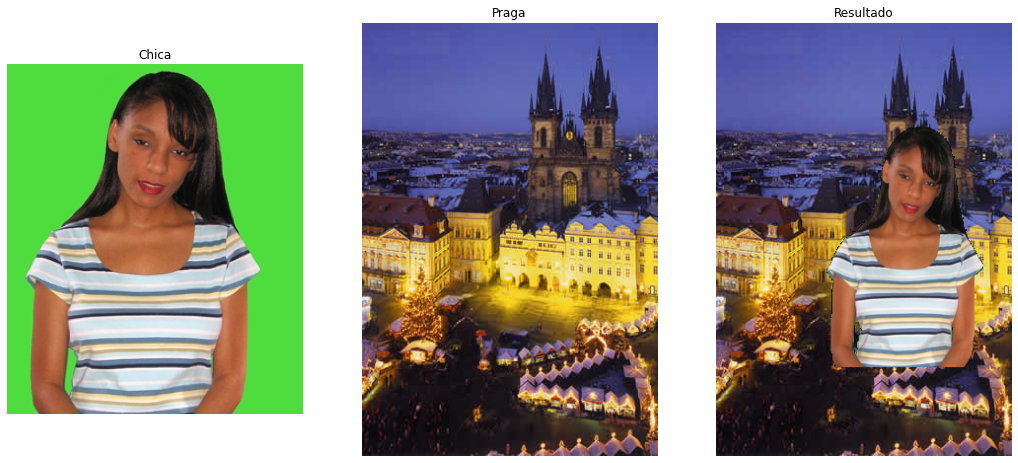

In [125]:
def chroma_key(img, img2, width, height, x, y):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Quitar fondo
    # Verde: HSV(60,255,255)
    # Cogemos el rango de +-30º
    lower_color = np.array([30,128,50])
    upper_color = np.array([90,255,255])
    mask = cv2.inRange(img_hsv, lower_color, upper_color)
    mask = 255 - mask

    # Aplicando la máscara
    res = cv2.bitwise_and(img, img, mask=mask)

    # Hacemos la superposición de imágenes en la zona indicada
    res = cv2.resize(res, (width,height))
    img2_cut = img2[x:x + height, y:y + width, :]

    res = np.where(res == 0, img2_cut, res)

    fin = img2.copy()
    fin[x:x + height, y:y + width,:] = res

    return cv2.cvtColor(fin, cv2.COLOR_BGR2RGB)    

# ---------------------------------------------------------------

width = 200
height = 250
x = y = 100

img = cv2.imread("chica.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("praga1.jpg", cv2.IMREAD_COLOR)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fin = chroma_key(img, img2, width, height, x, y)

plot_vector_img([img_rgb, img2_rgb, fin], titles=["Chica", "Praga", "Resultado"])

Crear una función que dada una imagen de color obtenga el histograma del canal rojo, verde y azul pero de una región de interés.

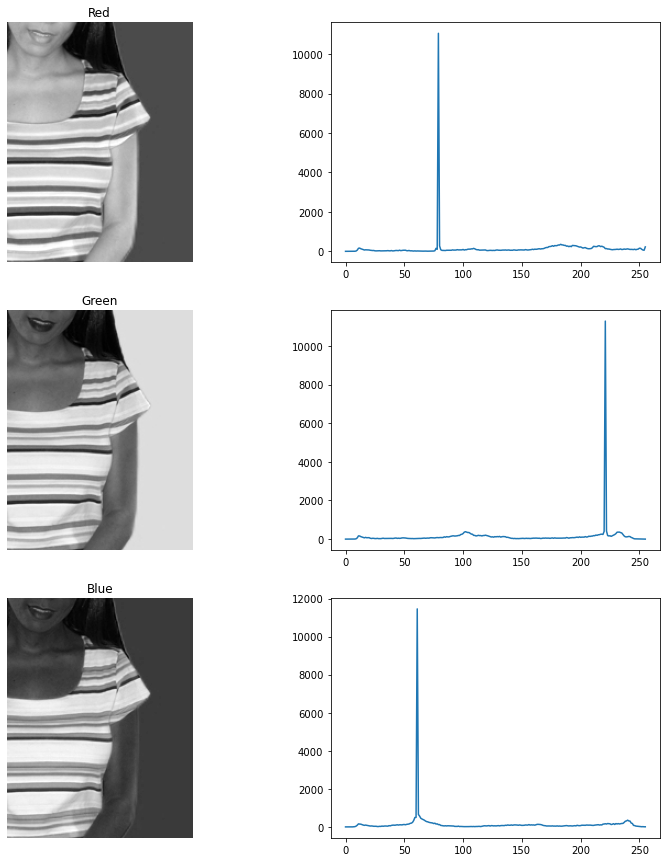

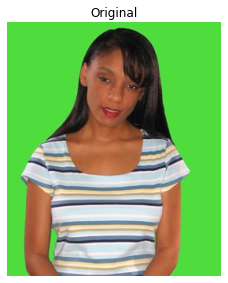

In [13]:
def plot_histograms(img, width, height, x, y):
    aux = img[x:x + height, y:y + width, :]

    fig = plt.figure(figsize=(13,15))
    titles = ["Red", "Green", "Blue"]
    for i in range(3):
        a = fig.add_subplot(3, 2, 2*i+1)
        plt.imshow(aux[:,:,i], "gray")
        a.set_title(titles[i])
        a.axis('off')

        a = fig.add_subplot(3, 2, 2*i+2)
        hist = cv2.calcHist([aux], [i], None, [256], [0,256])
        plt.plot(hist)

    plt.show()

# --------------------------------------

width = 200
height = 250
x = y = 100

img = cv2.imread('chica.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plot_histograms(img, width, height, x, y)
plot_vector_img([img], titles=["Original"])